Task 2 - User Engagement analysis

As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps. 

In telecommunication, tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well. If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores.

In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
sessions frequency 

the duration of the session 

the sessions total traffic (download and upload (bytes))

Task 2.1 - Based on the above submit python script and slide :

1.Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

2.Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

3.Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

4.Aggregate user total traffic per application and derive the top 10 most engaged users per application

5.Plot the top 3 most used applications using appropriate charts. 

6.Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
What is the optimized value of k (use elbow method for this)?  
Interpret your findings. 



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('../data/to_trasform.csv')

In [3]:
df.head(2)

,Unnamed: 0,Bearer_Id,Dur. (ms),IMSI,MSISDN,IMEI,last_location,avg_rtt_dl,avg_rtt_ul,throughput_avg_dl_kpbs,throughput_avg_ul_kpbs,retrans_packets_dl_b,retrans_packets_ul_b,tp_dl_below_50kbps_pc,tp_dl_50_250kbps_pc,tp_dl_250kbps_1mbps_pc,tp_dl_above_1mbps_pc,tp_ul_below_10kpbs_pc,tp_ul_10_50_kbps_pc,tp_ul_50_300_kbps_pc,tp_ul_above_300_kpbs_pc,activity_duration_dl,activity_duration_ul,Dur. (ms).1,phone_company,phone_name,t_vol_dl_above_6250B,t_vol_ul_above_1250B,socials_dl_b,socials_ul_b,google_dl_b,google_ul_b,email_dl_b,email_ul_b,youtube_dl_b,youtube_ul_b,netflix_dl_b,netflix_ul_b,gaming_dl_b,gaming_ul_b,other_dl_b,other_ul_b,Total_ul_b,Total_dl_b,total_ul_data,total_dl_data,socials_total_b,google_total_b,email_total_b,youtube_total_b,netflix_total_b,gaming_total_b,other_total_b,total_b
0,0,13114483460844900352,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42,5,23,44,20884183,766247,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,1570185,2905912,3701304,18355943,17855187,292426453,180558843,345629377
1,1,13114483482878900224,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20884183,766247,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,1933278,4414096,937385,39359124,35565545,609920783,541959383,707185356


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 

1.sessions frequency 

2.the duration of the session 

3.the sessions total traffic (download and upload (bytes))



1.Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [4]:
import sys
sys.path.insert(0,'../scripts')
from results_pickler import ResultPickler

In [5]:
results = ResultPickler()

In [6]:
session_f=df.groupby(['MSISDN'])["Dur. (ms).1"].count().reset_index(name='session_count')

In [7]:
session_frequency=session_f.sort_values(['session_count'], ascending=False).head(10)

In [8]:
results.add_data('session_frequency',session_frequency)

Aggregation by session duration

In [9]:
session_d=df.groupby(['MSISDN'])["Dur. (ms).1"].sum().reset_index(name='total_duration')

In [10]:
session_duration=session_d.sort_values(['total_duration'], ascending=False).head(10)

In [11]:
results.add_data('session_duration',session_duration)

Total upload and download

In [12]:
df['total_dl_ul']=df['total_dl_data'] + df['total_ul_data']

In [13]:
total_s_b=df.groupby(['MSISDN'])["total_dl_ul"].sum().reset_index(name='total_data')

In [14]:
total_session_b=total_s_b.sort_values(['total_data'], ascending=False).head(10)

In [15]:
results.add_data('total_session_b',total_session_b)

# Task 2.1 

 
Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

.


In [16]:
data  = pd.merge(total_s_b, session_d, on='MSISDN', how='left')
data  = pd.merge(data, session_f, on='MSISDN', how='left')

In [17]:
data.head(10)

,MSISDN,total_data,total_duration,session_count
0,33601001722,1255787564,116720140,1
1,33601001754,436417344,181230963,1
2,33601002511,1091052984,134969374,1
3,33601007832,447568699,49878024,1
4,33601008617,2235054657,37104453,2
5,33601010682,1095575829,253983077,2
6,33601011634,859918491,128360523,2
7,33601011959,510773383,86399977,1
8,33601014694,2016653584,495702147,2
9,33601020306,866204929,124854778,1


# Normalization

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [18]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import decomposition
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [19]:
from sklearn.preprocessing import Normalizer
import seaborn as sns


norm = Normalizer()
    
normalized_data = norm.fit_transform(data)




In [20]:
normalized_data

array([[9.99296320e-01, 3.73472167e-02, 3.47126575e-03, 2.97400753e-11],
       [9.99901122e-01, 1.29869399e-02, 5.39308455e-03, 2.97580748e-11],
       [9.99465184e-01, 3.24534803e-02, 4.01467754e-03, 2.97451001e-11],
       ...,
       [9.99999938e-01, 2.18891917e-04, 2.74438393e-04, 3.12791182e-13],
       [1.00000000e+00, 2.19775015e-06, 7.50831375e-07, 2.96735872e-15],
       [1.00000000e+00, 5.98725178e-07, 9.85774082e-07, 1.13327661e-15]])

k-means

In [21]:
kmeanModel = KMeans(n_clusters=3, random_state = 0)
kmeanModel.fit_predict(normalized_data )


array([0, 0, 0, ..., 0, 0, 0])

In [22]:
model1_centroids=kmeanModel.cluster_centers_

In [23]:
model1_centroids

array([[9.99615529e-01, 2.59326565e-02, 3.21799066e-03, 3.13791393e-11],
       [9.92306726e-01, 1.17472729e-01, 1.56727598e-02, 1.18362870e-10],
       [9.98285422e-01, 5.68149065e-02, 5.43864352e-03, 5.52081640e-11]])

In [24]:
kmeanModel.inertia_

17.05467424862771

In [25]:
kmeanModel.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
features = data.copy()

In [27]:
labels = kmeanModel.labels_
varieties = features['MSISDN'].to_list()

In [28]:
np.array(np.unique(labels, return_counts=True)).T

array([[    0, 74464],
       [    1,  4728],
       [    2, 27279]], dtype=int64)

In [29]:
data_cluster = pd.DataFrame({'CLUSTERS': labels, 'MSISDN': varieties})

In [30]:
data_cluster['CLUSTERS'].value_counts().to_frame()

,CLUSTERS
0,74464
2,27279
1,4728


In [31]:
data_cluster.head(5)

,CLUSTERS,MSISDN
0,0,33601001722
1,0,33601001754
2,0,33601002511
3,0,33601007832
4,2,33601008617


In [32]:
data2 = pd.merge(data,data_cluster, on='MSISDN')
data2.head()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
0,33601001722,1255787564,116720140,1,0
1,33601001754,436417344,181230963,1,0
2,33601002511,1091052984,134969374,1,0
3,33601007832,447568699,49878024,1,0
4,33601008617,2235054657,37104453,2,2


# Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [33]:
data2_0 = data2[data2['CLUSTERS'] == 0]
data2_1 = data2[data2['CLUSTERS'] == 1]
data2_2 = data2[data2['CLUSTERS'] == 2]

In [34]:
data2_0.shape

(74464, 5)

In [35]:
data2_0.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,74464,74464,74464,74464,74464
mean,50091236646,873347106,108418414,1,0
std,3461281088331,301650254,80345049,0,0
min,33601001722,58362293,7142988,1,0
25%,33650788515,657241906,57179283,1,0
50%,33663668868,896656394,86583414,1,0
75%,33683645017,1111628602,143708415,1,0
max,882397108489451,1407548816,2083210006,4,0


In [36]:
data2_1.shape

(4728, 5)

In [37]:
data2_1.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,4728,4728,4728,4728,4728
mean,33677300944,3992605579,535322107,4,1
std,43504188,1089282447,629948803,1,0
min,33601034530,2608284800,33476692,2,1
25%,33658759616,3249926495,296320128,3,1
50%,33664184722,3686552172,387414358,4,1
75%,33684116055,4398808620,518331394,5,1
max,33789881186,16341524035,18553763486,18,1


In [38]:
data2_2.shape

(27279, 5)

In [39]:
data2_2.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,27279,27279,27279,27279,27279
mean,33674129753,1915778448,183343303,2,2
std,45338633,418152505,133949395,1,0
min,33601008617,1356439704,7342167,1,2
25%,33650875060,1548680042,86400009,1,2
50%,33663516947,1816921603,170093196,2,2
75%,33682870024,2216556568,246468769,2,2
max,33789980299,2994737796,1867677937,5,2


In [40]:
pd.options.display.float_format = '{:,.2f}'.format
average_measures = data2.iloc[:,2:].groupby(['CLUSTERS']).mean()


In [41]:
average_measures.T.style.highlight_max(color = 'lightgreen', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"108,418,414.31","535,322,107.01","183,343,303.32"
session_count,1.06,4.02,1.86


In [42]:
average_measures.T.style.highlight_min(color = 'pink', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"108,418,414.31","535,322,107.01","183,343,303.32"
session_count,1.06,4.02,1.86


# Aggregation based on social media

In [43]:
socials=df.groupby(['MSISDN'])["socials_total_b"].sum().reset_index(name='socials_total')

In [44]:
social_media_traffic=socials.sort_values(['socials_total'], ascending=False).head(10)

In [45]:
results.add_data('social_media_traffic',social_media_traffic)

# Aggregation based on google

In [46]:
google=df.groupby(['MSISDN'])["google_total_b"].sum().reset_index(name='google_total')

In [47]:
google_traffic=google.sort_values(['google_total'], ascending=False).head(10)

In [48]:
results.add_data('google_traffic',google_traffic)

# Aggregation based on email

In [49]:
email=df.groupby(['MSISDN'])["email_total_b"].sum().reset_index(name='mail_total')

In [50]:
email_traffic=email.sort_values(['mail_total'], ascending=False).head(10)

In [51]:
results.add_data('email_traffic',email_traffic)

# Aggregation based on YouTube

In [52]:
youtube=df.groupby(['MSISDN'])["youtube_total_b"].sum().reset_index(name='yt_total')

In [53]:
youtube_traffic=youtube.sort_values(['yt_total'], ascending=False).head(10)

In [54]:
results.add_data('youtube_traffic',youtube_traffic)

# Aggregation based on Netflix

In [55]:
netflix=df.groupby(['MSISDN'])["netflix_total_b"].sum().reset_index(name='netflix_total')

In [56]:
netflix_traffic=netflix.sort_values(['netflix_total'], ascending=False).head(10)

In [57]:
results.add_data('netflix_traffic',netflix_traffic)

# Aggregation based on Gaming

In [58]:
gaming=df.groupby(['MSISDN'])["gaming_total_b"].sum().reset_index(name='gaming_total')

In [59]:
gaming_traffic=gaming.sort_values(['gaming_total'], ascending=False).head(10)

In [60]:
results.add_data('gaming_traffic',gaming_traffic)

# Aggregation based on Other

In [61]:
other=df.groupby(['MSISDN'])["other_total_b"].sum().reset_index(name='other_total')

In [62]:
other_traffic=other.sort_values(['other_total'], ascending=False).head(10)

In [63]:
results.add_data('other_traffic',other_traffic)

# App perfomance

In [64]:
most_used_df = df.copy(deep=True)
most_used_df = most_used_df.loc[:,[ 'socials_total_b','google_total_b','email_total_b','youtube_total_b','netflix_total_b','gaming_total_b','other_total_b']]

In [65]:
total_app_data_usage = pd.DataFrame(most_used_df.sum(), columns=['Total Data (Bytes)'])
most_used_apps = total_app_data_usage.sort_values(by='Total Data (Bytes)',ascending=False).iloc[:5,:]

#Saving the data
results.add_data('most_used_apps',most_used_apps)
#result
most_used_apps

,Total Data (Bytes)
gaming_total_b,"63,910,124,731,666.00"
other_total_b,"63,770,726,326,023.00"
youtube_total_b,"3,362,537,620,065.00"
netflix_total_b,"3,360,563,670,772.00"
google_total_b,"1,159,544,186,717.00"


Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: What is the optimized value of k (use elbow method for this)?
Interpret your findings

In [66]:
data  = pd.merge(total_s_b, session_d, on='MSISDN', how='left')
data  = pd.merge(data, session_f, on='MSISDN', how='left')

In [67]:
engagement=pd.merge(data, other, on='MSISDN', how='left')
engagement=pd.merge(engagement, gaming, on='MSISDN', how='left')
engagement=pd.merge(engagement, netflix, on='MSISDN', how='left')
engagement=pd.merge(engagement, youtube, on='MSISDN', how='left')
engagement=pd.merge(engagement, google, on='MSISDN', how='left')
engagement=pd.merge(engagement, email, on='MSISDN', how='left')
#engagement=pd.merge(engagement, other_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, socials, on='MSISDN', how='left')

In [68]:
engagement.head(2)

,MSISDN,total_data,total_duration,session_count,other_total,gaming_total,netflix_total,yt_total,google_total,mail_total,socials_total
0,"33,601,001,722.00","1,255,787,564.00","116,720,140.00",1,"386,570,872.00","812,458,661.00","27,180,981.00","21,624,548.00","4,389,005.00","1,331,362.00","2,232,135.00"
1,"33,601,001,754.00","436,417,344.00","181,230,963.00",1,"281,710,071.00","119,750,078.00","11,221,763.00","12,432,223.00","5,334,863.00","3,307,781.00","2,660,565.00"


In [69]:
cat_features=['MSISDN']

In [70]:
numerical_features = ['total_data','total_duration','session_count','other_total','gaming_total','netflix_total','yt_total','google_total','mail_total','socials_total']

In [71]:
input_features = numerical_features + cat_features

In [72]:
features = engagement.copy()

# Encoding categorical variables

In [73]:
#casting the columns into strings
labelencoder = LabelEncoder()

#features[cat_features] = features[cat_features].apply(LabelEncoder().fit_transform)
features[cat_features] = features[cat_features].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')

# Scaling Numerical Data

In [74]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features[input_features])
#x_scaled

C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [75]:
import scipy.stats as stats
X_scaled = stats.zscore(x_scaled)
#X_scaled

# Elbow method to determine the clusters

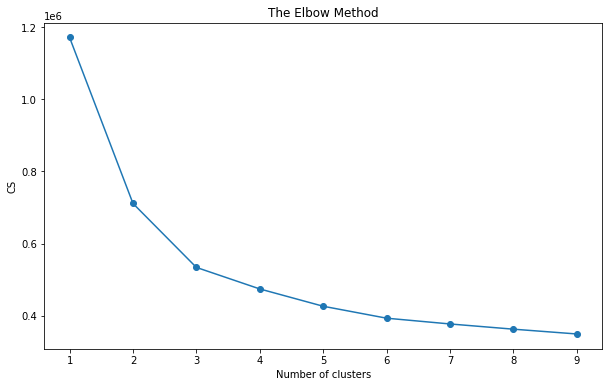

In [76]:
X = X_scaled


#sns.set(rc={"figure.figsize": (6, 8)})
plt.figure(figsize=(10,6))
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [77]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), cs, curve="convex", direction="decreasing")
kl.elbow

3

In [78]:
engagement_model = KMeans(n_clusters=3, random_state = 0)
engagement_model.fit_predict(x_scaled)
#print(kmeans.cluster_centers_)

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
engagement_model.inertia_

534341.4964348319

In [80]:
engagement_model.labels_
#print(kmeans.labels_)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
engagement_centroids=engagement_model.cluster_centers_

In [82]:
print(engagement_centroids)

[[-4.27061670e-01 -2.26296337e-01 -4.77238822e-01 -3.75557969e-01
  -3.73972691e-01 -4.14129750e-01 -4.12574166e-01 -4.02759683e-01
  -3.94541964e-01 -3.74088645e-01 -3.81801419e-03]
 [ 8.36901570e-01  3.39317269e-01  9.46163994e-01  7.37003538e-01
   7.31254760e-01  8.20651775e-01  8.10107015e-01  7.91472096e-01
   7.73888810e-01  7.40353604e-01 -3.45216596e-03]
 [ 3.37109539e+00  2.45646946e+00  3.69683904e+00  2.95789762e+00
   2.96238491e+00  3.21050841e+00  3.24646444e+00  3.16514232e+00
   3.10979233e+00  2.90621556e+00  1.00494885e-01]]


In [83]:
features = engagement.copy()

In [84]:
labels = engagement_model.labels_
varieties = features['MSISDN'].to_list()

In [85]:
np.array(np.unique(labels, return_counts=True)).T

array([[    0, 78139],
       [    1, 24522],
       [    2,  3810]], dtype=int64)

In [86]:
engagement_cluster = pd.DataFrame({'CLUSTERS': labels, 'MSISDN': varieties})

In [87]:
engagement_cluster['CLUSTERS'].value_counts().to_frame()

,CLUSTERS
0,78139
1,24522
2,3810


In [88]:
engagement_cluster.head()

,CLUSTERS,MSISDN
0,0,"33,601,001,722.00"
1,0,"33,601,001,754.00"
2,0,"33,601,002,511.00"
3,0,"33,601,007,832.00"
4,1,"33,601,008,617.00"


In [89]:
engagement2 = pd.merge(engagement,engagement_cluster, on='MSISDN')
engagement2.shape

(106471, 12)

In [90]:

engagement2.head(3)

,MSISDN,total_data,total_duration,session_count,other_total,gaming_total,netflix_total,yt_total,google_total,mail_total,socials_total,CLUSTERS
0,"33,601,001,722.00","1,255,787,564.00","116,720,140.00",1,"386,570,872.00","812,458,661.00","27,180,981.00","21,624,548.00","4,389,005.00","1,331,362.00","2,232,135.00",0
1,"33,601,001,754.00","436,417,344.00","181,230,963.00",1,"281,710,071.00","119,750,078.00","11,221,763.00","12,432,223.00","5,334,863.00","3,307,781.00","2,660,565.00",0
2,"33,601,002,511.00","1,091,052,984.00","134,969,374.00",1,"501,693,672.00","538,827,713.00","19,353,900.00","21,333,570.00","3,443,126.00","3,205,380.00","3,195,623.00",0


enga

In [91]:
engagement_cluster_0 = engagement2[engagement2['CLUSTERS'] == 0]
engagement_cluster_1 = engagement2[engagement2['CLUSTERS'] == 1]
engagement_cluster_2 = engagement2[engagement2['CLUSTERS'] == 2]

In [92]:
engagement_cluster_0.describe()

,MSISDN,total_data,total_duration,session_count,other_total,gaming_total,netflix_total,yt_total,google_total,mail_total,socials_total,CLUSTERS
count,"78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00","78,139.00"
mean,"49,319,048,911.02","919,837,076.98","104,356,468.69",1.01,"430,217,962.42","432,135,222.33","22,738,323.47","22,787,653.83","7,849,014.45","2,273,460.54","1,835,439.93",0.00
std,"3,378,906,843,726.15","344,182,884.22","75,113,390.73",0.10,"243,498,696.79","244,119,529.83","9,387,156.85","9,372,274.68","3,555,014.15","1,082,999.60","1,042,535.87",0.00
min,"33,601,001,722.00","58,362,293.00","7,142,988.00",1.00,"149,045.00","306,358.00","184,569.00","78,903.00","40,330.00","18,176.00","1,563.00",0.00
25%,"33,650,771,623.50","672,518,319.50","55,000,344.00",1.00,"219,482,129.00","221,442,774.50","16,014,017.50","16,053,668.00","4,967,769.50","1,363,777.00","934,055.00",0.00
50%,"33,663,646,574.00","919,903,811.00","86,400,040.00",1.00,"429,540,534.00","433,866,882.00","22,699,108.00","22,778,614.00","7,836,826.00","2,280,710.00","1,827,090.00",0.00
75%,"33,683,577,099.50","1,167,862,373.50","138,903,092.00",1.00,"640,870,838.50","643,213,289.50","29,374,507.00","29,477,122.50","10,714,200.00","3,171,117.50","2,738,010.50",0.00
max,"882,397,108,489,451.00","2,054,929,833.00","1,573,420,996.00",2.00,"1,501,430,614.00","1,460,050,595.00","73,657,380.00","78,099,852.00","27,307,801.00","8,142,171.00","6,842,090.00",0.00


In [93]:
engagement_cluster_1.describe()

,MSISDN,total_data,total_duration,session_count,other_total,gaming_total,netflix_total,yt_total,google_total,mail_total,socials_total,CLUSTERS
count,"24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00","24,522.00"
mean,"33,674,229,617.57","1,982,776,358.47","209,877,582.26",2.16,"930,109,893.65","929,057,726.81","49,053,152.32","48,850,458.86","16,868,594.78","4,872,911.08","3,963,620.98",1.00
std,"45,227,564.54","561,564,913.41","134,430,540.42",0.37,"378,124,084.44","375,632,839.97","15,734,245.20","15,533,589.54","5,726,152.62","1,738,609.14","1,609,721.55",0.00
min,"33,601,008,617.00","377,545,379.00","18,235,797.00",1.00,"21,747,166.00","22,123,644.00","3,539,613.00","3,590,164.00","1,346,703.00","200,967.00","61,882.00",1.00
25%,"33,650,922,727.50","1,585,038,524.00","116,043,829.75",2.00,"659,286,914.25","661,865,369.75","38,274,993.75","38,099,472.50","12,898,503.50","3,662,038.00","2,828,606.75",1.00
50%,"33,663,547,188.50","1,947,758,512.50","180,956,921.00",2.00,"917,101,365.50","917,776,791.50","48,204,909.50","47,881,828.50","16,576,449.00","4,772,538.00","3,902,472.50",1.00
75%,"33,682,791,459.75","2,334,788,377.00","265,277,363.75",2.00,"1,191,931,850.00","1,186,958,201.25","58,566,320.75","58,519,223.25","20,578,693.25","6,004,211.00","5,065,981.50",1.00
max,"33,789,980,299.00","4,270,493,909.00","2,083,210,006.00",4.00,"2,419,876,117.00","2,478,750,897.00","117,461,184.00","119,122,721.00","42,763,254.00","12,867,609.00","10,293,340.00",1.00


In [94]:
engagement_cluster_2.describe()

,MSISDN,total_data,total_duration,session_count,other_total,gaming_total,netflix_total,yt_total,google_total,mail_total,socials_total,CLUSTERS
count,"3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00","3,810.00"
mean,"33,678,763,365.58","4,113,828,638.63","604,925,332.57",4.38,"1,928,023,660.99","1,932,062,209.16","99,982,260.27","100,793,224.46","34,797,471.27","10,069,171.05","8,100,641.43",2.00
std,"43,604,650.01","1,196,289,477.92","684,335,716.72",1.20,"669,866,186.39","684,402,541.03","32,280,742.22","32,357,274.46","11,509,632.99","3,470,864.66","2,967,152.56",0.00
min,"33,601,270,437.00","1,797,646,786.00","46,899,075.00",3.00,"294,154,547.00","226,703,601.00","27,966,688.00","30,901,259.00","8,173,290.00","2,077,731.00","1,008,465.00",2.00
25%,"33,658,970,777.75","3,361,362,412.75","345,599,758.25",4.00,"1,498,680,342.00","1,489,098,519.00","79,626,387.25","79,815,585.25","27,274,012.00","7,836,467.00","6,184,347.50",2.00
50%,"33,664,403,909.50","3,911,361,746.00","431,555,645.50",4.00,"1,863,625,019.50","1,854,106,156.50","95,670,707.50","95,803,816.50","33,306,444.50","9,640,827.00","7,773,117.50",2.00
75%,"33,687,401,886.00","4,608,065,815.75","590,523,024.00",5.00,"2,265,058,065.50","2,277,310,470.00","114,241,619.75","115,561,215.25","39,913,943.50","11,683,890.00","9,654,490.00",2.00
max,"33,789,881,186.00","16,341,524,035.00","18,553,763,486.00",18.00,"8,167,877,776.00","7,749,432,234.00","399,519,079.00","452,958,769.00","152,191,852.00","42,418,782.00","43,374,779.00",2.00


In [95]:
pd.options.display.float_format = '{:,.2f}'.format
average_measures = engagement2.iloc[:,2:].groupby(['CLUSTERS']).mean()

In [96]:
average_measures.T.style.highlight_max(color = 'lightgreen', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"104,356,468.69","209,877,582.26","604,925,332.57"
session_count,1.01,2.16,4.38
other_total,"430,217,962.42","930,109,893.65","1,928,023,660.99"
gaming_total,"432,135,222.33","929,057,726.81","1,932,062,209.16"
netflix_total,"22,738,323.47","49,053,152.32","99,982,260.27"
yt_total,"22,787,653.83","48,850,458.86","100,793,224.46"
google_total,"7,849,014.45","16,868,594.78","34,797,471.27"
mail_total,"2,273,460.54","4,872,911.08","10,069,171.05"
socials_total,"1,835,439.93","3,963,620.98","8,100,641.43"


In [97]:
average_measures.T.style.highlight_min(color = 'pink', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"104,356,468.69","209,877,582.26","604,925,332.57"
session_count,1.01,2.16,4.38
other_total,"430,217,962.42","930,109,893.65","1,928,023,660.99"
gaming_total,"432,135,222.33","929,057,726.81","1,932,062,209.16"
netflix_total,"22,738,323.47","49,053,152.32","99,982,260.27"
yt_total,"22,787,653.83","48,850,458.86","100,793,224.46"
google_total,"7,849,014.45","16,868,594.78","34,797,471.27"
mail_total,"2,273,460.54","4,872,911.08","10,069,171.05"
socials_total,"1,835,439.93","3,963,620.98","8,100,641.43"


In [98]:
#saving our results to a pickle file
results.save_data('../data/engagement_results.pickle')

In [99]:
normalized_data

array([[9.99296320e-01, 3.73472167e-02, 3.47126575e-03, 2.97400753e-11],
       [9.99901122e-01, 1.29869399e-02, 5.39308455e-03, 2.97580748e-11],
       [9.99465184e-01, 3.24534803e-02, 4.01467754e-03, 2.97451001e-11],
       ...,
       [9.99999938e-01, 2.18891917e-04, 2.74438393e-04, 3.12791182e-13],
       [1.00000000e+00, 2.19775015e-06, 7.50831375e-07, 2.96735872e-15],
       [1.00000000e+00, 5.98725178e-07, 9.85774082e-07, 1.13327661e-15]])

In [100]:
engagement_normalized = pd.DataFrame(normalized_data, columns=['MSISDN','total_data','total_duration','session_count'])

In [101]:
engagement_normalized .head()

,MSISDN,total_data,total_duration,session_count
0,1.00,0.04,0.00,0.00
1,1.00,0.01,0.01,0.00
2,1.00,0.03,0.00,0.00
3,1.00,0.01,0.00,0.00
4,1.00,0.07,0.00,0.00


In [102]:
model1_centroids

array([[9.99615529e-01, 2.59326565e-02, 3.21799066e-03, 3.13791393e-11],
       [9.92306726e-01, 1.17472729e-01, 1.56727598e-02, 1.18362870e-10],
       [9.98285422e-01, 5.68149065e-02, 5.43864352e-03, 5.52081640e-11]])

In [103]:
centroids_df = pd.DataFrame(model1_centroids, columns=['MSISDN','total_data','total_duration','session_count'])


In [104]:
centroids_df.head(2)

,MSISDN,total_data,total_duration,session_count
0,1.00,0.03,0.00,0.00
1,0.99,0.12,0.02,0.00


In [105]:
centroids_df.to_csv('../data/engagement_centroid.csv')

In [106]:
engagement_normalized.to_csv('../data/engagement_cluster.csv')